# Init

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
rcupd = {
    'figure.figsize': (5, 4),
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'cm',
    'font.size': 12,
}
plt.rcParams.update(rcupd)

In [3]:
jar = pd.read_csv('inliers_hi_FR_hi_GS_160C.csv')

In [4]:
jar.iloc[:, 3] *= 1e17
jar.iloc[:, 6] *= 1e30

In [5]:
xscaler = MinMaxScaler()
X = xscaler.fit_transform(jar.iloc[:, :-1])
y = jar.iloc[:, -1].values

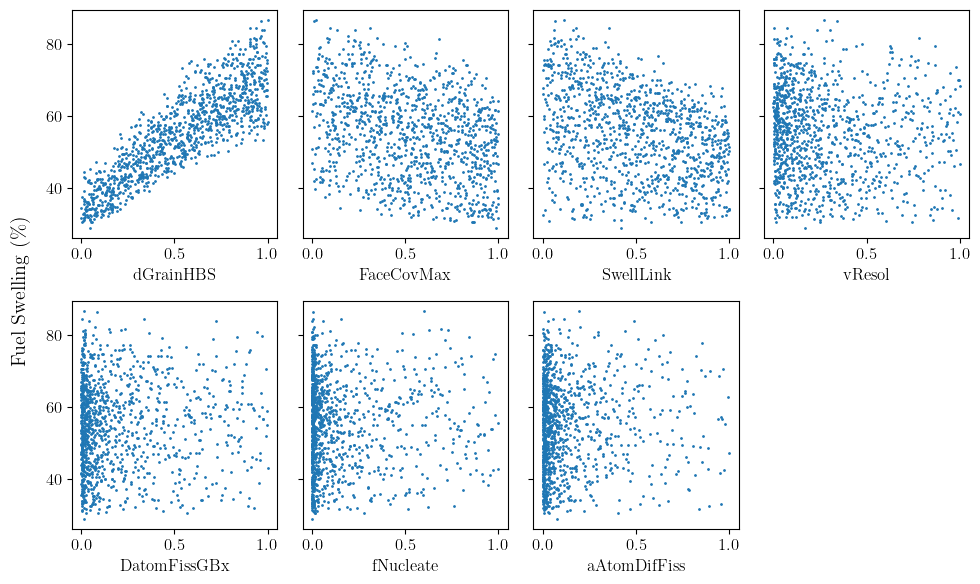

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(10, 6))

for i in range(7):
    axes[i//4, i%4].scatter(X[:,i], y, s=1)
    axes[i//4, i%4].set_xlabel(jar.columns[i])

fig.delaxes(axes[1,3])
fig.supylabel(r'Fuel Swelling (\%)')
plt.tight_layout()
plt.show()

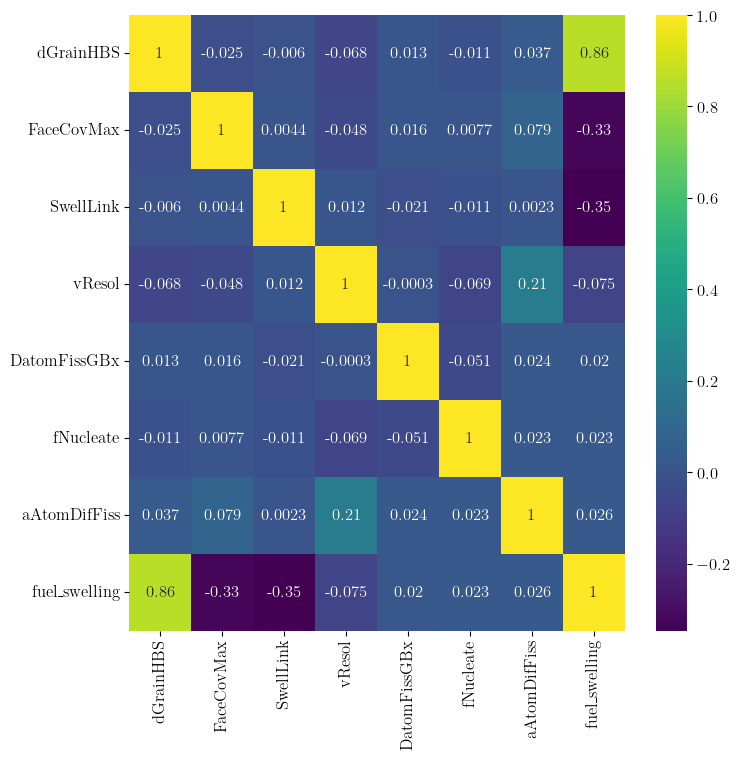

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(jar.corr(), annot=True, cmap='viridis')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=17
)

# Feature selection

In [8]:
from sklearn import linear_model

In [9]:
estimator = linear_model.LinearRegression()

In [10]:
from sklearn.feature_selection import RFE

In [94]:
selector = RFE(estimator, n_features_to_select=3, step=1)

In [95]:
selector = selector.fit(X, y)

In [96]:
selector.support_

array([ True,  True,  True, False, False, False, False])

In [97]:
selector.ranking_

array([1, 1, 1, 4, 5, 2, 3])

In [15]:
from sklearn.feature_selection import RFECV

In [22]:
from sklearn.model_selection import KFold

In [66]:
cv = KFold(5)

In [67]:
rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=cv,
    scoring='explained_variance',
    min_features_to_select=1,
    n_jobs=2,
)

In [68]:
rfecv.fit(X, y)

,estimator,LinearRegression()
,step,1
,min_features_to_select,1
,cv,KFold(n_split...shuffle=False)
,scoring,'explained_variance'
,verbose,0
,n_jobs,2
,importance_getter,'auto'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [69]:
rfecv.n_features_

np.int64(6)

In [70]:
rfecv.support_

array([ True,  True,  True,  True, False,  True,  True])

In [71]:
rfecv.ranking_

array([1, 1, 1, 1, 2, 1, 1])

In [78]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [85]:
fs = SelectKBest(score_func=mutual_info_regression, k=3)

In [86]:
fs.fit(X, y)

,score_func,<function mut...x7f85f2adee80>
,k,3


In [87]:
fs.scores_

array([0.74272453, 0.07739338, 0.13665718, 0.        , 0.        ,
       0.00691545, 0.        ])